### Rafidah Shafa Ariza Ramadhan
### 202131139
### B Machine Learning

## IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## IMPORT DATA

In [2]:
data = pd.read_csv('tennis.csv')
data 

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   day       14 non-null     object
 1   outlook   14 non-null     object
 2   temp      14 non-null     object
 3   humidity  14 non-null     object
 4   wind      14 non-null     object
 5   play      14 non-null     object
dtypes: object(6)
memory usage: 804.0+ bytes


In [4]:
data.describe()

,day,outlook,temp,humidity,wind,play
count,14,14,14,14,14,14
unique,14,3,3,2,2,2
top,D1,Sunny,Mild,High,Weak,Yes
freq,1,5,6,7,8,9


## MENGUBAH OBJECT MENJADI NUMERIK

In [5]:
from sklearn.preprocessing import LabelEncoder
for col in ['day', 'outlook', 'temp', 'humidity', 'wind','play']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    data
    print (data['day'],data['outlook'],data['temp'],data['humidity'],data['wind'],data['play'])

0      0
1      6
2      7
3      8
4      9
5     10
6     11
7     12
8     13
9      1
10     2
11     3
12     4
13     5
Name: day, dtype: int64 0        Sunny
1        Sunny
2     Overcast
3         Rain
4         Rain
5         Rain
6     Overcast
7        Sunny
8        Sunny
9         Rain
10       Sunny
11    Overcast
12    Overcast
13        Rain
Name: outlook, dtype: object 0      Hot
1      Hot
2      Hot
3     Mild
4     Cool
5     Cool
6     Cool
7     Mild
8     Cool
9     Mild
10    Mild
11    Mild
12     Hot
13    Mild
Name: temp, dtype: object 0       High
1       High
2       High
3       High
4     Normal
5     Normal
6     Normal
7       High
8     Normal
9     Normal
10    Normal
11      High
12    Normal
13      High
Name: humidity, dtype: object 0       Weak
1     Strong
2       Weak
3       Weak
4       Weak
5     Strong
6     Strong
7       Weak
8       Weak
9       Weak
10    Strong
11    Strong
12      Weak
13    Strong
Name: wind, dtype: object 0      No
1

In [6]:
data

,day,outlook,temp,humidity,wind,play
0,0,2,1,0,1,0
1,6,2,1,0,0,0
2,7,0,1,0,1,1
3,8,1,2,0,1,1
4,9,1,0,1,1,1
5,10,1,0,1,0,0
6,11,0,0,1,0,1
7,12,2,2,0,1,0
8,13,2,0,1,1,1
9,1,1,2,1,1,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   day       14 non-null     int64
 1   outlook   14 non-null     int64
 2   temp      14 non-null     int64
 3   humidity  14 non-null     int64
 4   wind      14 non-null     int64
 5   play      14 non-null     int64
dtypes: int64(6)
memory usage: 804.0 bytes


In [8]:
data=data.drop('day',axis=1)

## DATA X DAN Y

In [9]:
x = data.drop('play', axis = 1)
y = data['play']

In [10]:
x

,outlook,temp,humidity,wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state =0) 

In [12]:
print (x_train)

    outlook  temp  humidity  wind
13        1     2         0     0
9         1     2         1     1
1         2     1         0     0
7         2     2         0     1
10        2     2         1     0
3         1     2         0     1
0         2     1         0     1
5         1     0         1     0
12        0     1         1     1


In [13]:
print (x_test)

    outlook  temp  humidity  wind
8         2     0         1     1
6         0     0         1     0
4         1     0         1     1
11        0     2         0     0
2         0     1         0     1


In [14]:
print (y_test)

8     1
6     1
4     1
11    1
2     1
Name: play, dtype: int64


## PEMODELAN 
Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier(max_depth=2)
model_DT.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [16]:
predict_DT = model_DT.predict(x_test)

In [17]:
from sklearn.metrics import accuracy_score
print("akurasi score sebenarnya: ", accuracy_score(y_test, predict_DT)*100)

akurasi score sebenarnya:  0.0


In [18]:
x_baru_DT = ([[0,2,1,1]])

In [19]:
prediksi_baru_DT = model_DT.predict(x_baru_DT)
print(prediksi_baru_DT)

[1]


/Users/rafidahshafaarizaramadhan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# VISUALISASI DATA MODEL DECISION TREE

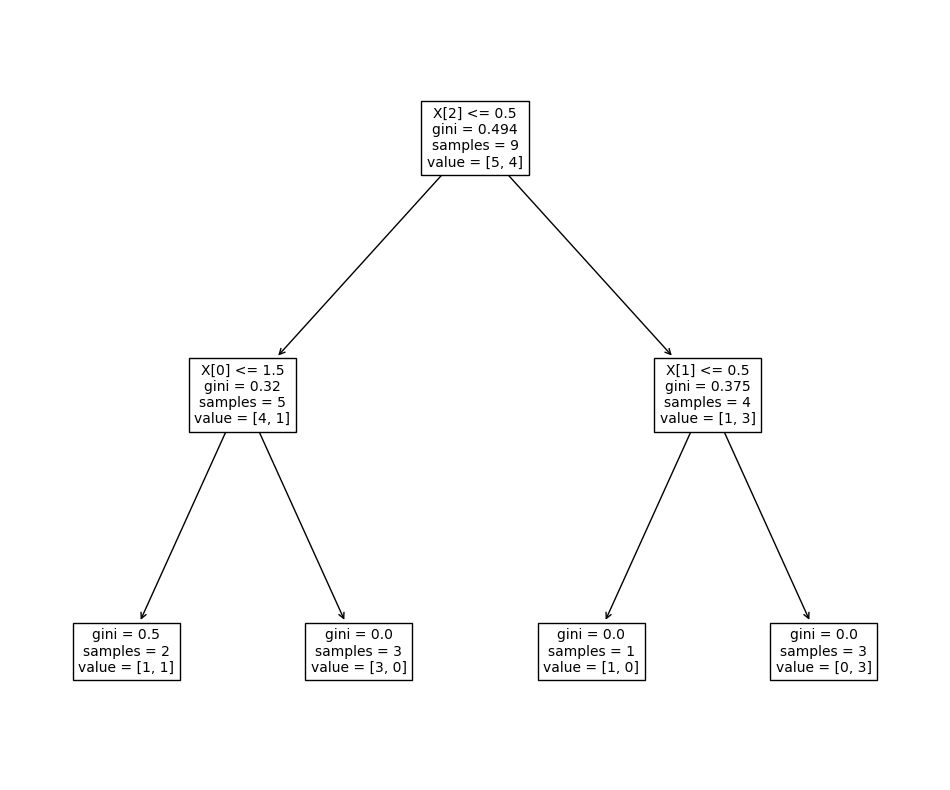

In [20]:
from sklearn.tree import plot_tree

plt.subplots(figsize=(12,10))
plot_tree (model_DT, fontsize = 10 )
plt.show()
